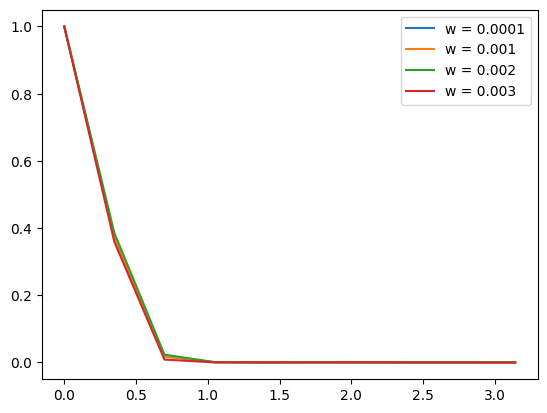

In [1]:
from functions import calk_noisy_pk
from matplotlib import pyplot as plt
import numpy as np

ks = np.linspace(0, np.pi, 10)
tau = 10
dt = 0.01
for w in [0.0001, 0.001, 0.002, 0.003]:
    noise = np.random.normal(0, np.sqrt(w**2 / dt), size=np.arange(0, tau, dt).shape)
    pks = calk_noisy_pk(ks, tau, noise)
    plt.plot(ks,pks, label=f'w = {w}')
plt.legend()
plt.show()

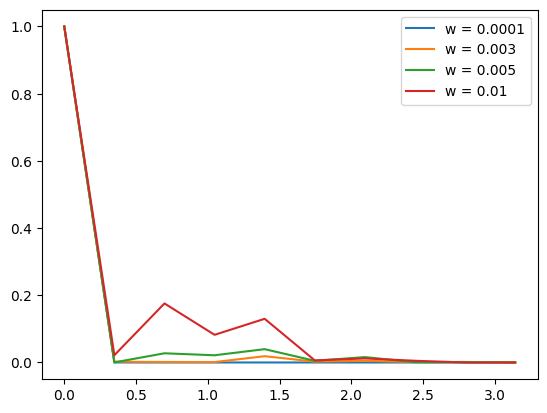

In [2]:
from functions import calk_noisy_pk
from matplotlib import pyplot as plt
import numpy as np

ks = np.linspace(0, np.pi, 10)
tau = 100
dt = 0.01
for w in [0.0001, 0.003, 0.005, 0.01]:
    noise = np.random.normal(0, np.sqrt(w**2 / dt), size=np.arange(0, tau, dt).shape)
    pks = calk_noisy_pk(ks, tau, noise)
    plt.plot(ks,pks, label=f'w = {w}')
plt.legend()
plt.show()

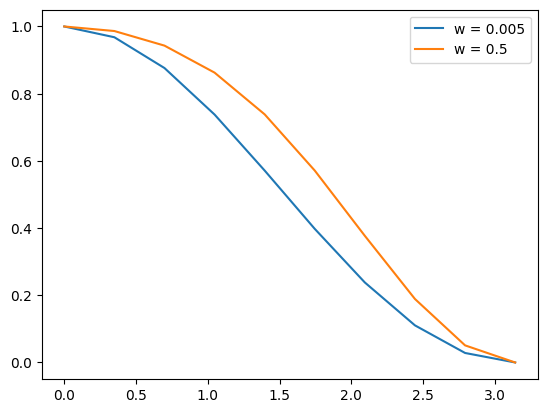

In [12]:
from functions import calk_noisy_pk
from matplotlib import pyplot as plt
import numpy as np

ks = np.linspace(0, np.pi, 10)
tau = 0.21
dt = 0.01
for w in [0.005, 0.5]:
    noise = np.random.normal(0, np.sqrt(w**2 / dt), size=np.arange(0, tau, dt).shape)
    pks = calk_noisy_pk(ks, tau, noise)
    plt.plot(ks,pks, label=f'w = {w}')
plt.legend()
plt.show()

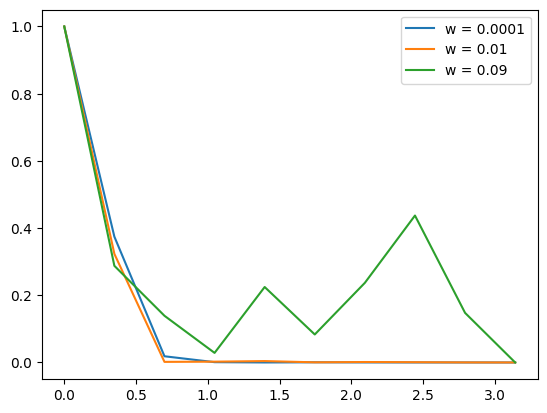

In [45]:
from functions import calk_noisy_pk
from matplotlib import pyplot as plt
import numpy as np

ks = np.linspace(0, np.pi, 10)
tau = 10
dt = 0.01
for w in [ 0.0001, 0.01, 0.09]:
    noise = np.random.normal(0, np.sqrt(w**2 / dt), size=np.arange(0, tau, dt).shape)
    pks = calk_noisy_pk(ks, tau, noise)
    plt.plot(ks,pks, label=f'w = {w}')
plt.legend()
plt.show()

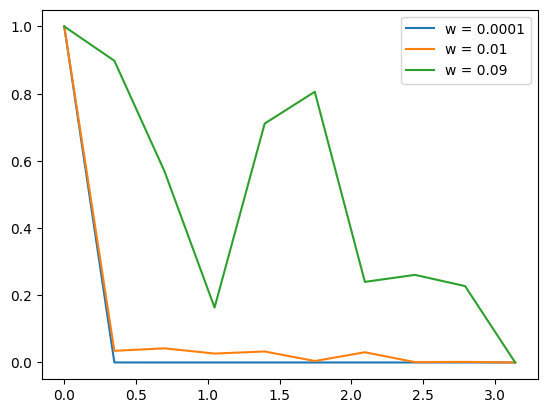

In [47]:
from functions import calk_noisy_pk
from matplotlib import pyplot as plt
import numpy as np

ks = np.linspace(0, np.pi, 10)
tau = 100
dt = 0.01
for w in [ 0.0001, 0.01, 0.09]:
    noise = np.random.normal(0, np.sqrt(w**2 / dt), size=np.arange(0, tau, dt).shape)
    pks = calk_noisy_pk(ks, tau, noise)
    plt.plot(ks,pks, label=f'w = {w}')
plt.legend()
plt.show()

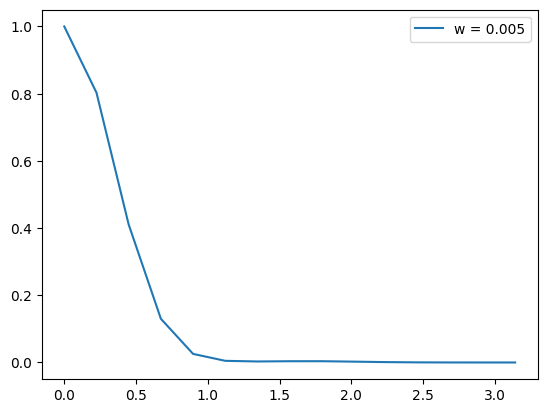

In [17]:
from functions import calk_noisy_pk
from matplotlib import pyplot as plt
import numpy as np

ks = np.linspace(0, np.pi, 15)
tau = 5
dt = 0.01
for w in [0.005]:
    noise = np.random.normal(0, np.sqrt(w**2 / dt), size=np.arange(0, tau, dt).shape)
    pks = calk_noisy_pk(ks, tau, noise)
    plt.plot(ks,pks, label=f'w = {w}')
plt.legend()
plt.show()

NameError: name 'cos_squared' is not defined

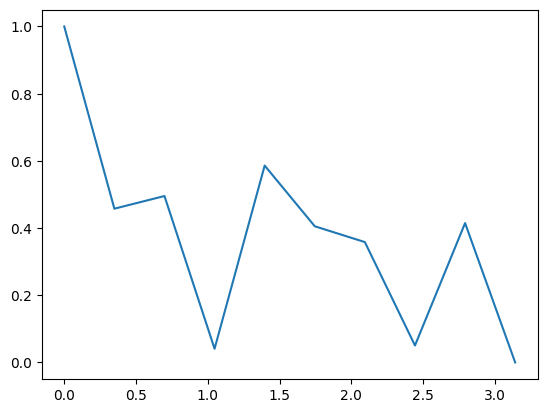

In [4]:
# Plotting
plt.plot(ks, avg_pks, label=f'w = {w} (Noise)')
plt.plot(ks, cos_squared, label=r'$\cos^2(k/2)$', linestyle='--', color='red')  # Adding the cos^2(k/2) plot
plt.legend()
plt.title('Average Plot of Noisy Signals with Cos^2(k/2)')
plt.xlabel('k values')
plt.ylabel('Processed k values')
plt.grid(True)
plt.show()

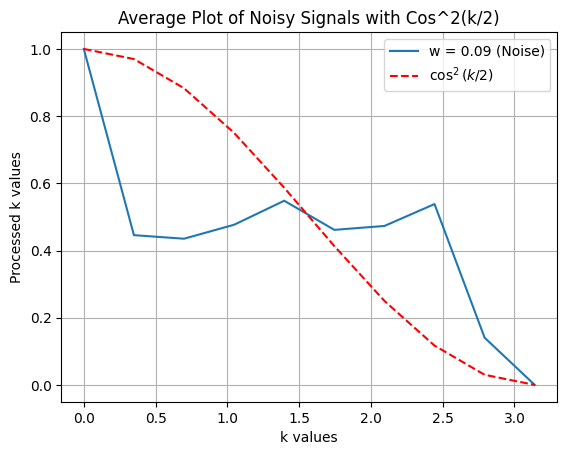

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from concurrent.futures import ProcessPoolExecutor
import os

# Assuming the function 'calk_noisy_pk' is properly defined in the imported module
from functions import calk_noisy_pk

def simulate_noise_and_compute(ks, tau, dt, w):
    """
    Simulate the noise and compute the pks for one run.
    """
    # Set the nice value of the process
    os.nice(1)
    noise = np.random.normal(0, np.sqrt(w**2 / dt), size=int(tau / dt))
    return calk_noisy_pk(ks, tau, noise)

# Parameters
ks = np.linspace(0, np.pi, 10)  # k values
tau = 50  # Total time
dt = 0.01  # Time step
num_simulations = 1000  # Number of simulations to average
w = 0.09  # Strength of the noise

# Use ProcessPoolExecutor to parallelize the simulations
with ProcessPoolExecutor() as executor:
    results = list(executor.map(simulate_noise_and_compute, [ks]*num_simulations, [tau]*num_simulations, [dt]*num_simulations, [w]*num_simulations))

# Calculate average
avg_pks = np.mean(results, axis=0)

# Calculate cos^2(k/2)
cos_squared = np.cos(ks/2)**2

# Plotting
plt.plot(ks, avg_pks, label=f'w = {w} (Noise)')
plt.plot(ks, cos_squared, label=r'$\cos^2(k/2)$', linestyle='--', color='red')  # Adding the cos^2(k/2) plot
plt.legend()
plt.title('Average Plot of Noisy Signals with $Cos^2(k/2)$')
plt.xlabel('k values')
plt.ylabel('Processed k values')
plt.grid(True)
plt.show()


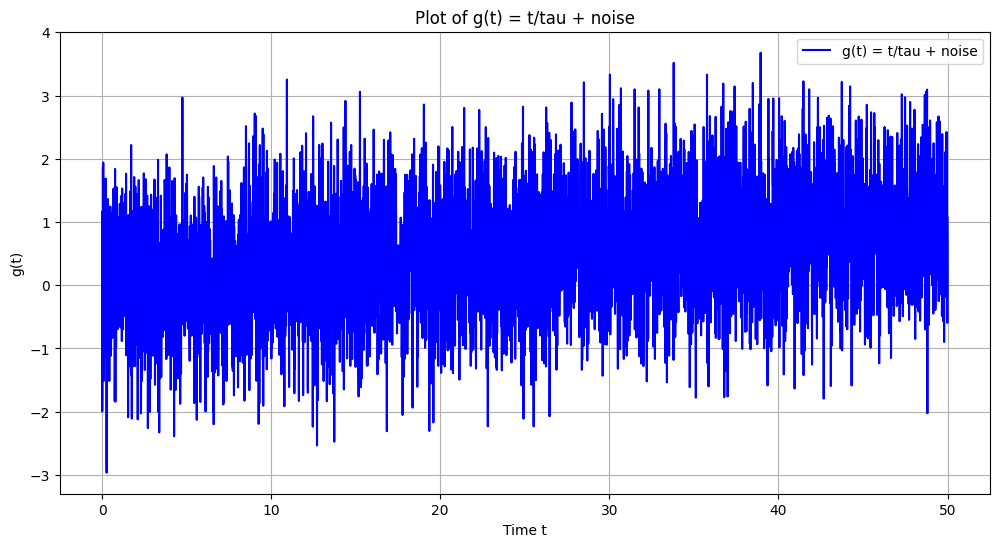

In [6]:
# Set the parameters based on calculation
dt = 0.01
W = 0.09  # W calculated as sqrt(W^2)
tau = 50  # Total time for normalization

# Generate noise
num_samples = int(tau / dt)
noise_samples = np.random.normal(0, np.sqrt(W**2 / dt), num_samples)

# Define the function g(t) = t/tau + noise
def g_function(t, tau, noise_samples):
    return t / tau + noise_samples

# Parameters

t_values = np.linspace(0, tau, num_samples)  # Time values from 0 to tau

# Compute g(t) values
g_values = g_function(t_values, tau, noise_samples)

# Plot g(t)
plt.figure(figsize=(12, 6))
plt.plot(t_values, g_values, label='g(t) = t/tau + noise', color='blue')
plt.title('Plot of g(t) = t/tau + noise')
plt.xlabel('Time t')
plt.ylabel('g(t)')
plt.grid(True)
plt.legend()
plt.show()

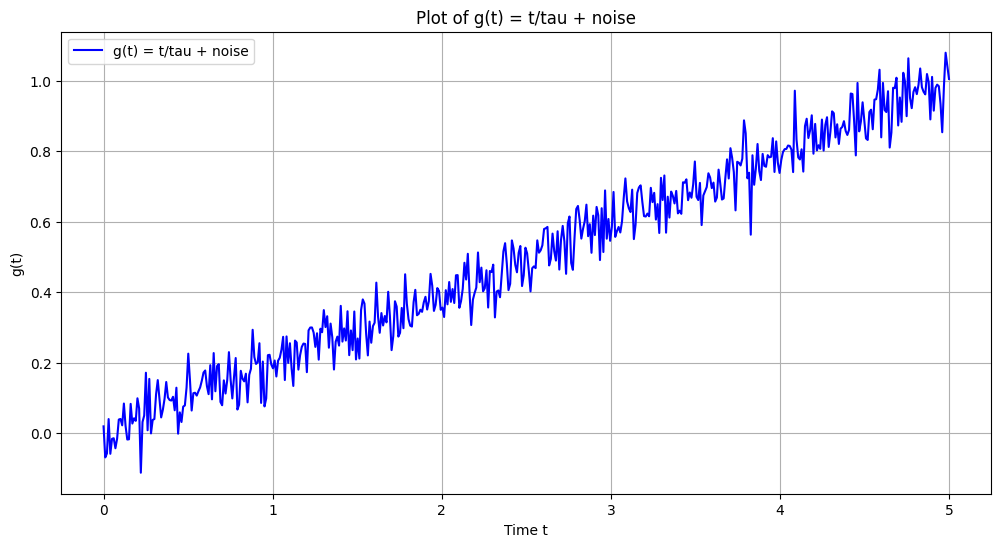

In [12]:
import numpy as np
from matplotlib import pyplot as plt

# Set the parameters based on calculation
dt = 0.01
W = 0.005  # W calculated as sqrt(W^2)
tau = 5  # Total time for normalization

# Generate noise
num_samples = int(tau / dt)
noise_samples = np.random.normal(0, np.sqrt(W**2 / dt), num_samples)

# Define the function g(t) = t/tau + noise
def g_function(t, tau, noise_samples):
    return t / tau + noise_samples

# Parameters

t_values = np.linspace(0, tau, num_samples)  # Time values from 0 to tau

# Compute g(t) values
g_values = g_function(t_values, tau, noise_samples)

# Plot g(t)
plt.figure(figsize=(12, 6))
plt.plot(t_values, g_values, label='g(t) = t/tau + noise', color='blue')
plt.title('Plot of g(t) = t/tau + noise')
plt.xlabel('Time t')
plt.ylabel('g(t)')
plt.grid(True)
plt.legend()
plt.show()

In [19]:
# Example of usage in a simulation loop
for t, gamma_t in zip(np.arange(0, tau, dt), noise):
    # Here, gamma_t is the noise at time t
    # You can use gamma_t to modify the Hamiltonian or other parts of your simulation
    print(f"Time: {t}, Noise: {gamma_t}")


Time: 0.0, Noise: 0.15243736088624835
Time: 0.001, Noise: -0.052793369668114806
Time: 0.002, Noise: 0.23328469816586853
Time: 0.003, Noise: -0.19680823731958277
Time: 0.004, Noise: -0.27568785175098187
Time: 0.005, Noise: -0.09379819848553268
Time: 0.006, Noise: -0.1204275178315304
Time: 0.007, Noise: 0.36550170890440126
Time: 0.008, Noise: 0.056429046048823865
Time: 0.009000000000000001, Noise: 0.3895323722699358
Time: 0.01, Noise: 0.1817349386614914
Time: 0.011, Noise: -0.014770524812039911
Time: 0.012, Noise: -0.04973068603287147
Time: 0.013000000000000001, Noise: 0.20578071849494795
Time: 0.014, Noise: -0.05693386617675061
Time: 0.015, Noise: 0.5484555051222161
Time: 0.016, Noise: -0.1367404888509531
Time: 0.017, Noise: 0.26105870519283164
Time: 0.018000000000000002, Noise: 0.39948318441213626
Time: 0.019, Noise: -0.2826760909528199
Time: 0.02, Noise: 0.22947872158736995
Time: 0.021, Noise: -0.033733823109753286
Time: 0.022, Noise: 0.028643416303618708
Time: 0.023, Noise: 0.0045183

In [21]:
import numpy as np
from scipy.integrate import solve_ivp

# Constants
dt = 0.01  # Time step
T = 1.0    # Total time
W = 0.1    # Strength of the noise
time_steps = np.arange(0, T, dt)

# Generate white noise array
noise_array = np.random.normal(0, np.sqrt(W**2 / dt), size=time_steps.shape)

# Define other functions and operators
def V_func(k):
    sigZ = np.array([[1, 0], [0, -1]])
    sigX = np.array([[0, 1], [1, 0]])
    v_x = 2 * np.sin(k)
    v_z = -2 * (np.cos(k) + 1)
    return v_z * sigZ + v_x * sigX

def H0(t, tau, k):
    g_t = t / tau
    cos_k = np.cos(k)
    sin_k = np.sin(k)
    A_k = np.array([[1 - g_t - g_t * cos_k, g_t * sin_k],
                    [g_t * sin_k, -(1 - g_t - g_t * cos_k)]])
    return 2 * A_k

def commutator(A, B):
    return np.dot(A, B) - np.dot(B, A)

def rho_dt(t, y, tau, k, noise_idx):
    rho = y.reshape(2, 2)
    H = H0(t, tau, k) + noise_array[noise_idx] * V_func(k)  # Using noise from the noise array
    U = -1j * commutator(H, rho)
    rho_dot = U.flatten()
    return rho_dot

# Parameters for the solve_ivp function
k = np.pi / 4  # Example k value
tau = 1.0      # Example tau value
rho_initial = np.array([[0, 0], [0, 1]], dtype=complex).flatten()

# Solve the Schrödinger equation using solve_ivp
sol = solve_ivp(rho_dt, (0, T), rho_initial, args=(tau, k, 0), t_eval=time_steps, method='RK45', vectorized=True)

# Print the solution at each time step
for idx, time_point in enumerate(sol.t):
    print(f"Time {time_point:.2f}, Density matrix:\n{sol.y[:, idx].reshape(2, 2)}\n")


Time 0.00, Density matrix:
[[0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]

Time 0.01, Density matrix:
[[8.07371990e-04+0.j         2.51706309e-03+0.02829335j]
 [2.51706309e-03-0.02829335j 9.99192628e-01+0.j        ]]

Time 0.02, Density matrix:
[[0.00318604+0.j         0.00994027+0.05547273j]
 [0.00994027-0.05547273j 0.99681396+0.j        ]]

Time 0.03, Density matrix:
[[0.00703155+0.j         0.02195437+0.08062428j]
 [0.02195437-0.08062428j 0.99296845+0.j        ]]

Time 0.04, Density matrix:
[[0.01218976+0.j         0.03808782+0.10293355j]
 [0.03808782-0.10293355j 0.98781024+0.j        ]]

Time 0.05, Density matrix:
[[0.0184683 +0.j         0.05774807+0.12165974j]
 [0.05774807-0.12165974j 0.9815317 +0.j        ]]

Time 0.06, Density matrix:
[[0.0256449 +0.j         0.08024661+0.13621123j]
 [0.08024661-0.13621123j 0.9743551 +0.j        ]]

Time 0.07, Density matrix:
[[0.03346819+0.j         0.10480117+0.14616612j]
 [0.10480117-0.14616612j 0.96653181+0.j        ]]

Time 0.08, Density matrix:
[[0.0

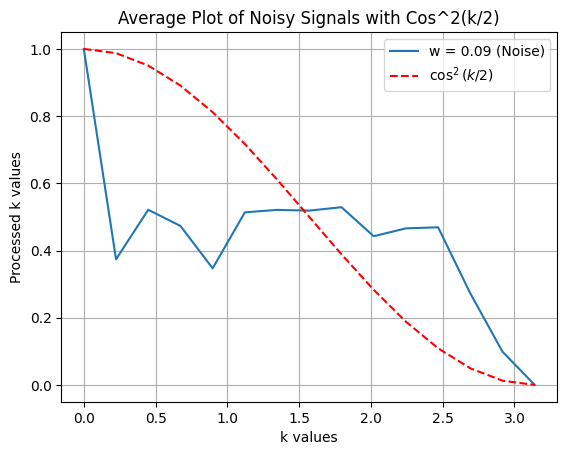

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from concurrent.futures import ProcessPoolExecutor
import os

# Assuming the function 'calk_noisy_pk' is properly defined in the imported module
from functions import calk_noisy_pk

def simulate_noise_and_compute(ks, tau, dt, w):
    """
    Simulate the noise and compute the pks for one run.
    """
    # Set the nice value of the process
    os.nice(1)
    noise = np.random.normal(0, np.sqrt(w**2 / dt), size=int(tau / dt))
    return calk_noisy_pk(ks, tau, noise)

# Parameters
ks = np.linspace(0, np.pi, 15)  # k values
tau = 50  # Total time
dt = 0.01  # Time step
num_simulations = 2000  # Number of simulations to average
w = 0.09  # Strength of the noise

# Use ProcessPoolExecutor to parallelize the simulations
with ProcessPoolExecutor() as executor:
    results = list(executor.map(simulate_noise_and_compute, [ks]*num_simulations, [tau]*num_simulations, [dt]*num_simulations, [w]*num_simulations))

# Calculate average
avg_pks = np.mean(results, axis=0)

# Calculate cos^2(k/2)
cos_squared = np.cos(ks/2)**2

# Plotting
plt.plot(ks, avg_pks, label=f'w = {w} (Noise)')
plt.plot(ks, cos_squared, label=r'$\cos^2(k/2)$', linestyle='--', color='red')  # Adding the cos^2(k/2) plot
plt.legend()
plt.title('Average Plot of Noisy Signals with Cos^2(k/2)')
plt.xlabel('k values')
plt.ylabel('Processed k values')
plt.grid(True)
plt.show()


In [24]:
import sympy as sp

# Define the symbol k, assuming it is a real number
k = sp.symbols('k', real=True)

# Define the matrix V
V = sp.Matrix([
    [-1 - sp.cos(k), sp.sin(k)],
    [sp.sin(k), 1 + sp.cos(k)]
])

# Compute the transpose of V (since entries are real, transpose = conjugate transpose)
V_dagger = V.transpose()

# Define the matrix rho as a generic 2x2 matrix with symbolic entries
rho_11, rho_12, rho_21, rho_22 = sp.symbols('rho_11 rho_12 rho_21 rho_22')
rho = sp.Matrix([
    [rho_11, rho_12],
    [rho_21, rho_22]
])

# Compute V @ rho @ V_dagger
term1 = V @ rho @ V_dagger

# Compute rho @ V_dagger @ V
term2 = rho @ V_dagger @ V

# Compute V_dagger @ V @ rho
term3 = V_dagger @ V @ rho

# Calculate the final expression
expression = term1 - 0.5 * term2 - 0.5 * term3

# Create equations for each element being zero
equations = [sp.Eq(expression[i, j], 0) for i in range(2) for j in range(2)]

# Solve the equations
solution = sp.solve(equations, (rho_11, rho_12, rho_21, rho_22))

# Display the solutions
solution[rho_11]


rho_21*(-2.0*cos(k)/sin(k) - 2.0/sin(k)) + rho_22

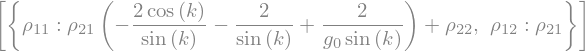

In [28]:
import sympy as sp

# Define the symbols k and g_0, assuming both are real numbers
k, g_0 = sp.symbols('k g_0', real=True)

# Define the matrix H
H = sp.Matrix([
    [1 - g_0 - g_0 * sp.cos(k), g_0 * sp.sin(k)],
    [g_0 * sp.sin(k), -(1 - g_0 - g_0 * sp.cos(k))]
])

# Define the matrix rho as a generic 2x2 matrix with symbolic entries
rho_11, rho_12, rho_21, rho_22 = sp.symbols('rho_11 rho_12 rho_21 rho_22')
rho = sp.Matrix([
    [rho_11, rho_12],
    [rho_21, rho_22]
])

# Compute the commutator [H, rho] = H * rho - rho * H
commutator = H * rho - rho * H

# Create equations for each element being zero
equations = [sp.Eq(commutator[i, j], 0) for i in range(2) for j in range(2)]

# Solve the equations
solution = sp.solve(equations, (rho_11, rho_12, rho_21, rho_22), dict=True)

solution
